# Cass-Koopmans Optimal Growth Model 

> **Note the following:** 
The model can be viewed as an extension of the model of Robert Solow but adapted to make the savings rate the outcome of an optimal choice. This is in contrast to that of the Solow model which assumed a constant savings rate determined outside the model. In the following we will describe two versions of the model to illustrate what is, in fact, a more general connection between a planned economy and an economy organised as a competitive equilibirum. 

Imports and set magics:

In [52]:
import numpy as np
from numba import njit
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

## Growth Model 

Time is discrete and takes the values t=0,1...,T. A single good can either be consumed or invested in physical capital. The consumption good is not durable and depreciates completely if not consumed immediately. The capital good is durable but depreciates each period at rate $\gamma \epsilon (0,1)$. 

We consider the ** Cass-Koopmans model** where:

* $C_t$ is a nondurable consumption good at time t.
* $K_t$ is is the stock of physical capital at time t.
* Let $\overrightarrow{\text{C}={C_0,...,C_T}$ and $\overrightarrow{\text{K}={K_1,...,K{T+1}}$

A representative household is endowed with one unit of labour $N_t$ at eat t, such that $N_t=1$ for all $t \epsilon [0,T]$. 

The representative household has preferences over consumption bundles ordered by the utility function: 

$$ U(C)=\sum_{T=0}^\T \beta_^t\frac{C_t^{1-\gamma}}{1-\gamma} $$

where $\beta \epsilon (0,1)$ is a disconut factor and $\gamma > 0$ governs the curvature of the one-period utility function. 

Note that

$$ u(C_t)=\frac{C_t^{1-\gamma}}{1-\gamma} $$

satisfies $u'>0, u''<0$. 

$u'>0$ asserts the consumer prefers more to less
$u''<0$ asserts that marginal utility declines with increases in $C_t$
We assume that $K_0>0$ is a given exogenous level of intial capital. 

There is an economy-wide production function: 

$$ F(K_t, N_t)=AK_t^\alphaN_t^{1-\alpha} $$

with 0 < \alpha < 1, A>0. 
A feasible allocation C, K satisfies
$$ C_t+K_t+1 \leq F(K_t,N_t)+(1-\delta)K_t,$$ 

for all $t \epsilon[0,T]$

where $\delta \epsilon(0,1)$ is a depreciation rate of capital. 


## Planning Problem

A planner chooses an allocation ${C,K}$, to maximise the utility function subject to the feasible allocation. Let $\mu ={\mu_0,...,\mu_T}$ be a sequence of nonnegative Lagrange multipliers. To find an optimal allocation, we use the Lagrangian

$$ Lagrange(C, K, \mu) = \sum_{t=1}^{T}\beta^t{\mu(C_t)+\mu_t(F(K_t, 1)+(1-\delta)K_t-C_t-K_{t+1})} $$

and then solve the following max problem

$$ max \Lagrange (C,K, \mu)

\textbf{Useful Properties of Linearly Homogenous Production Function}

Notice that 

$$ F(K_t, N_t)=AK^\alpha_tN^{1-\alpha}_t=N_tA(\frac{K_t}{N_t})^\alpha $$

Define the output per-capital production function 

$$f(\frac{K_t}{N_t})=A(\frac{K_t}{N_t})^\alpha

whose argument is capital per-capita. 

Then we have that 

$$F(K_t,N_t)=N_tf(\frac{K_t}{N_t})

Taking the derivate with respect to K, yields

$$ \frac{\delta F}{\delta K} = \frac{\delta N_tf({\frac{K_t}{N_t})}}{\delta N_t} $$
$$ = N_tf'(\frac{K_t}{N_t}\frac{1}{N_t}) $$
$$ =f' (\frac{K_t}{N_t} \bigg\rvert_{N_t=1} $$
$$ f'(K_t) $$

Also

$$ \frac{\delta F}{\delta N} = \frac{\delta N_t f(\frac{K_t}{N_t})}{\delta N_t} $$
$$ = f(\frac{K_t}{N_t})+N_tf'(\frac{K_t}{N_t})-\frac{-K_t}{N_t^2}) $$
$$ = f(\frac{K_t}{N_t})- \frac{K_t}{N_t}f'(\frac{K_t}{N_t})\bigg\rvert_{N_t=1} $$
$$ = f(K_t)-f'(K_t)K_t $$

\textbf{Back to Solving the Problem}

To solve the Lagrangian maximasation problem, we compute first derivatives of Lagrangian and set them equal to 0. 

Our objective function and constraints satisfy conditions that work to assure that required second-order conditions are satisfied at an allocation that satisfies the first-order conditions that we are about to compute. 

The first-order conditions for maximisation with respet to C, K: 

$$ C_t: \mu'(C_t)=\mu_t = 0 for all t= 0,1,...,T $$
$$ K_t: \beta \mu_t[(1-\delta)+f'(K_t)]-\mu–{t-1}=0 for all t=1,2,...,T $$
$$ \mu_t:F(K_t,1)+(1-\delta)K_t-C_t-K_{t+1}=0 for all t=0,1,...,T $$ 
$$ K_{T+1}: -\mu_T 	\leq 0, 	\leq if K_{T+1}=0; =0 if K_{T+1} > 0 $$

In the equation for $C_t$ we plugged in for $\frac{\delta F}{\delta K}$ using the formula given above. Because $N_t=1$ for all t=1,...,T, we do not need to differentiate with respect to those arguments. Note that the equation for $\mu_t$ comes from the occurrence of $K_t$ in both the period t and period t-1 feasibility constraints. The equation for $K_{T+1}$ comes from differentiating with respect to $K_{T+1}$ in the last period and applying the following Karush-Kuhn-Tucker condition: 

$$ \mu_tK_{T+1}=0 $$. 

Combining the equations for $C_t$ and $K_t$ yields

$$ \mu'(C_t)[(1-\delta)+f'(K_t)]-\mu'(C{t-1})=0 $$ for all t=1,2,...,T+1

Rewriting yields 

$$ u'(C_{t+1})[(1-/delta)+f'(K_{t+1})]=\mu'(C_t) $$ for all t=0,1,...,T

Taking the inverse of the utility function on both sides of the above equation gives 

$$ C_{t+1}=\mu^'{-1}((\frac{\beta}{\mu'(C_t)}[f'(K_{t+1})+(1-\delta)])^{-1}) $$ 

Or using the utility function 

$$ C_{t+1}=(\beta C^{\gamma}_t[f'(K_{t+1})+(1-\delta)])^{1/\gamma} $$
$$ C_t(\beta[f'(K_{t+1})+(1-\delta)])^{1/\gamma} $$

The above first-order condition for consumption is an Euler Equation. It tells us how consumption in adjacent periods are optimally related to each other and to capital next period. We now use some of the equations above to calculate some variables and functions that we'll soon use to solve the planning problem. 

First we define all symbols

In [36]:
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
beta = sm.symbols('beta')
A = sm.symbols('A')

In [48]:
# Utility Function
def u(c, gamma): 
    if y == 1:  # if y = 1 we can via L'hopital's Rule show that the utility becomes log
        return np.log(c)
    else: 
        return (c**(1-gamma))/(1-gamma)

#The derivative of utility
def u_prime(c, gamma): 
    if gamma == 1:
        return 1/c
    else: 
        return c**(-gamma)

#Inverse utility
def u_prime_inverse(c, gamma):
    if gamma == 1: 
        return c
    else: 
        return c**(-1/gamma)

#Production function 
def f(A, k, alpha):
    return A*k**alpha

#Derivative of production function
def f_prime(A, k, alpha):
    return alpha*A*k**(alpha-1)

#Inverse production function
def f_prime_inverse(A, k, alpha):
    return (k/(A*alpha))**(1/(alpha-1))

We will be using the scipy method to compute an optimal allocation C,K and an associated Lagrange multiplier sequence $\mu$. The first-order conditions for the planning problem, form a sa system of difference equations with two boundary conditions

* $K_0$ is a given initial condition for capital
* $K_{T+1}=0$ is a terminal condition for capital

We have no initial condition for the Lagrange multiplier $\mu_0$. If we did, we could solve we allocation simply by computing $c_0$ and $k_1$ and then iterate on to compute the remaining elements of C, K, $\mu$. But in this instance, we will to use the scipy optimise algorithm. 

In the following we implement the optimise algorithm for the planning problem. We make a slight modification starting with a guess of $c_0$ but since $c_0$ is a function of $\mu_0$ there is no difference to the procedure above. We'll apply it with an initial guess that will turn out not to be ideal, which will prevail in the below. 

The parameters are: 
* c = Initial consumption 
* k = Initial capital
* y = Coefficient of relative risk aversion 
* delta = Depreciation rate on capital 
* beta = Discount factor
* alpha = return to capital per capital
* A = technology

In [ ]:
Define the model parameters

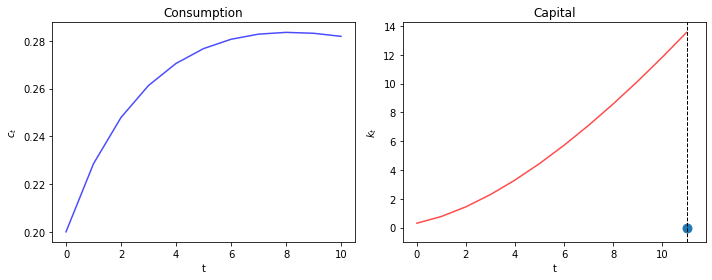

In [62]:
# Parameters
gamma=2
delta=0.02
beta=0.95
alpha=0.33
A=1

# Initial guesses
T=10
c=np.zeros(T+1) #T periods of consumption initialised to 0
k=np.zeros(T+2) #T periods of capital initialised to 0(T+2 to include t+1 variable as well)
k[0]=0.3 #Initial k
c[0]=0.2 #Guess of c_0

def algorithm_method(c, k, gamma, delta, beta, alpha, A):
    T = len(c)-1 
    for t in range(T): 
        k[t+1]=f(A=A, k=k[t], alpha=alpha)+(1-delta)*k[t]-c[t] # Equation 1 with inequality
        if k[t+1]<0: #Ensuring nonnegativity
            k[t+1]=0
    # Equation 2: We keep in the general form to who how we would solve if we did not want to do any simplification 
        if beta*(f_prime(A=A, k=k[t+1], alpha=alpha)+(1-delta))==np.inf: 
            #Only occurs if k[t+1] is 0, in which case we will not produce anything next period, so consumption will have to go to 0
            c[t+1]=0
        else: c[t+1]=u_prime_inverse(u_prime(c=c[t], gamma=gamma)/(beta*(f_prime(A=A, k=k[t+1], alpha=alpha)+(1-delta))), gamma=gamma)


#Terminal condition calculation
    k[T+1]=f(A=A, k=k[T], alpha=alpha)+(1-delta)*k[T]-c[T]

    return c, k

paths = algorithm_method(c, k, gamma, delta, beta, alpha, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

From the graphs above, it is evident that our guess for $\mu_0$ is too high and makes initial consumption too low. This is evident because the $K_{T+1}=0$ target is missing on the high side. 

In the following section we will automate the above procedure with a an algorithm searching for a good $\mu_0$, stoppring when we hit the target $K_{T+1}=0$. We take an initial guess for $C_0$ ($\mu_0$ can be eliminated because $C_0$ is an exact function of $\mu_0$). We know that the lowest $C_0$ can ever be is 0 and the largest it can be is initial output $f(K_0)$. We will take a guess on $C_0$ towards T+1. If $K_{T+1}>0$, let it be our new lower bound on $C_0$. If $K_{T+1}<0$, let it be our new upper bound. We will make a new guess for $C_0$ exactly halfway between our new upper and lower bounds. When $K_{T+1}$ gets close enough to 0 (wihtin some error tolerance bounds), the procedure will stop and we will have our values for consumption and capital. 

In [59]:
def new_algorithm_method(c, k, gamma, delta, beta, alpha, A, tol=1e-4, max_iter=1e4, terminal=0): # Terminal is the value we are estimating towards

    T = len(c) - 1
    i = 1                            # Initial iteration
    c_high = f(k=k[0], alpha=alpha, A=A)     # Initial high value of c
    c_low = 0                        # Initial low value of c

    path_c, path_k = algorithm_method(c, k, gamma, delta, beta, alpha, A)

    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) \
        and i < max_iter:

        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is now a lower bound
            # on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell  too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]

        c[0] = (c_high + c_low) / 2  # This is the bisection part
        path_c, path_k = algorithm_method(c, k, gamma, delta, beta, alpha, A)
        i += 1

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Converged successfully on iteration', i-1)
    else:
        print('Failed to converge and hit maximum iteration')

    u = u_prime(c=path_c, gamma=gamma)
    return path_c, path_k, u

In [ ]:
Plot

Converged successfully on iteration 18


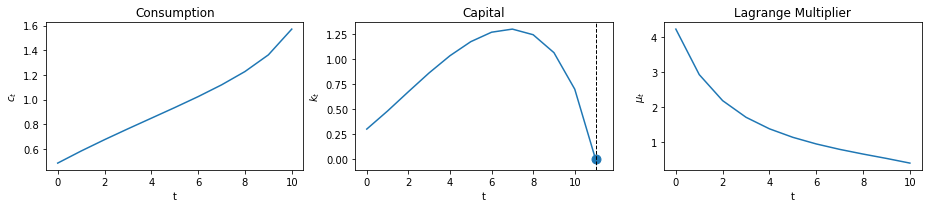

In [60]:
T = 10
c = np.zeros(T+1) # T periods of consumption initialized to 0
# T periods of capital initialized to 0. T+2 to include t+1 variable as well
k = np.zeros(T+2)

k[0] = 0.3 # initial k
c[0] = 0.3 # our guess of c_0

paths = new_algorithm_method(c, k, gamma, delta, beta, alpha, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of capital
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

In [ ]:
# Parameters
Y=2
δ= 0.02
β

=# Steady state

# Further analysis

ADD FURTHER ANALYSIS, VISUALIZATIONS AND EXTENSIONS.

# Conclusion

ADD CONCISE CONCLUSION.